# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
! pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=9489bf5d200d0aa9b72870b7340538084a886d1f95d151e5052aec985b33833c
  Stored in directory: c:\users\elizabeth\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
 # Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "standard"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

#create a list to save weather data for each city
weather_data = []

#counters
recordcounter = 1
setcounter = 1
    
#loop through the cities to grab the data
#for x, city in enumerate(cities[0:55]):
for x, city in enumerate(cities):    
    
    #group into sets of 50
    if (x % 50 == 0 and x >= 50):
        setcounter += 1
        recordcounter = 0
        
        
    city_url = query_url+city
    print(f"Processing record {recordcounter} of Set {setcounter} | {city}")
    recordcounter += 1

    try:
            response = requests.get(city_url).json()
            lon = response['coord']['lon']
            lat = response['coord']['lat']
            temp = response['main']['temp']
            humidity = response['main']['humidity']
            cloudiness = response['clouds']['all']
            windspeed = response['wind']['speed']

            city_dict = {'City': city,
                        'Longitude': lon,
                        'Latitude': lat,
                        'Temperature': temp,
                        'Humidity': humidity,
                        'Cloudiness': cloudiness,
                        'Windspeed': windspeed}

            weather_data.append(city_dict)
            
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing record 1 of Set 1 | mataura
Processing record 2 of Set 1 | vila velha
Processing record 3 of Set 1 | dikson
Processing record 4 of Set 1 | barrow
Processing record 5 of Set 1 | bluff
Processing record 6 of Set 1 | tutoia
Processing record 7 of Set 1 | hermanus
Processing record 8 of Set 1 | yumen
Processing record 9 of Set 1 | qingdao
Processing record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing record 11 of Set 1 | qaanaaq
Processing record 12 of Set 1 | pangnirtung
Processing record 13 of Set 1 | labrea
Processing record 14 of Set 1 | kapaa
Processing record 15 of Set 1 | port alfred
Processing record 16 of Set 1 | chokurdakh
Processing record 17 of Set 1 | ushuaia
Processing record 18 of Set 1 | khatanga
Processing record 19 of Set 1 | rikitea
Processing record 20 of Set 1 | zemio
Processing record 21 of Set 1 | ruatoria
City not found. Skipping...
Processing record 22 of Set 1 | hobart
Processing record 23 of Set 1 | jamestown
Processing record 24 of S

Processing record 38 of Set 4 | mkushi
Processing record 39 of Set 4 | san
Processing record 40 of Set 4 | banyo
Processing record 41 of Set 4 | paamiut
Processing record 42 of Set 4 | pangody
Processing record 43 of Set 4 | sawtell
Processing record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing record 45 of Set 4 | butaritari
Processing record 46 of Set 4 | pangai
Processing record 47 of Set 4 | mountain home
Processing record 48 of Set 4 | luderitz
Processing record 49 of Set 4 | ilulissat
Processing record 0 of Set 5 | saint-philippe
Processing record 1 of Set 5 | kodiak
Processing record 2 of Set 5 | saleaula
City not found. Skipping...
Processing record 3 of Set 5 | middletown
Processing record 4 of Set 5 | verkhniye tatyshly
Processing record 5 of Set 5 | atikokan
Processing record 6 of Set 5 | tecoanapa
Processing record 7 of Set 5 | ipixuna
Processing record 8 of Set 5 | dowa
Processing record 9 of Set 5 | candiis
Processing record 10 of Set 5 | hofn
Processi

Processing record 26 of Set 8 | fukue
Processing record 27 of Set 8 | severo-kurilsk
Processing record 28 of Set 8 | coyuca
City not found. Skipping...
Processing record 29 of Set 8 | tuskegee
Processing record 30 of Set 8 | saint-joseph
Processing record 31 of Set 8 | thunder bay
Processing record 32 of Set 8 | tomatlan
Processing record 33 of Set 8 | pemangkat
Processing record 34 of Set 8 | great yarmouth
Processing record 35 of Set 8 | avarua
Processing record 36 of Set 8 | zeya
Processing record 37 of Set 8 | nacala
Processing record 38 of Set 8 | urumqi
Processing record 39 of Set 8 | harper
Processing record 40 of Set 8 | genhe
Processing record 41 of Set 8 | srisailam
Processing record 42 of Set 8 | kysyl-syr
Processing record 43 of Set 8 | mackay
Processing record 44 of Set 8 | santa isabel do rio negro
Processing record 45 of Set 8 | louisbourg
City not found. Skipping...
Processing record 46 of Set 8 | shirokiy
Processing record 47 of Set 8 | sobolevo
Processing record 48 of

Processing record 15 of Set 12 | nkan
Processing record 16 of Set 12 | tual
Processing record 17 of Set 12 | xuddur
Processing record 18 of Set 12 | bakchar
Processing record 19 of Set 12 | revda
Processing record 20 of Set 12 | martapura
Processing record 21 of Set 12 | kedougou
Processing record 22 of Set 12 | pangkalanbuun
Processing record 23 of Set 12 | zhicheng
Processing record 24 of Set 12 | kawalu
Processing record 25 of Set 12 | rabaul
Processing record 26 of Set 12 | mendahara
City not found. Skipping...
Processing record 27 of Set 12 | asayita
City not found. Skipping...
Processing record 28 of Set 12 | lazarev
Processing record 29 of Set 12 | novo cruzeiro
Processing record 30 of Set 12 | namibe
Processing record 31 of Set 12 | ngaoundere
Processing record 32 of Set 12 | nurota
Processing record 33 of Set 12 | alta floresta
Processing record 34 of Set 12 | juneau
Processing record 35 of Set 12 | viedma
Processing record 36 of Set 12 | madimba
Processing record 37 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head(10)

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,mataura,168.8643,-46.1927,277.56,87,76,1.02
1,vila velha,-40.2925,-20.3297,298.68,77,20,7.20
2,dikson,80.5464,73.5069,262.52,95,100,5.72
3,barrow,-156.7887,71.2906,259.16,78,100,5.14
4,bluff,168.3333,-46.6000,281.75,65,93,1.91
5,tutoia,-42.2744,-2.7619,302.86,61,100,5.36
6,hermanus,19.2345,-34.4187,292.48,61,15,8.02
7,yumen,97.2000,40.2833,271.82,44,42,0.69
8,qingdao,120.3719,36.0986,280.93,66,75,1.00
9,qaanaaq,-69.3632,77.4840,255.79,88,100,2.06


In [52]:
weather_data_df.count()
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         563 non-null    object 
 1   Longitude    563 non-null    float64
 2   Latitude     563 non-null    float64
 3   Temperature  563 non-null    float64
 4   Humidity     563 non-null    int64  
 5   Cloudiness   563 non-null    int64  
 6   Windspeed    563 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 30.9+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

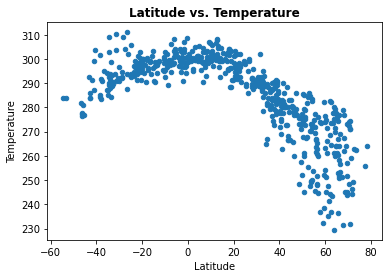

In [66]:
weather_data_df.plot.scatter (x='Latitude', y='Temperature')

plt.title('Latitude vs. Temperature',
         fontweight = 'bold')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

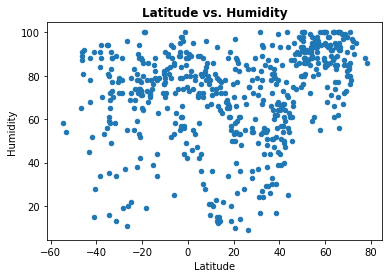

In [67]:
weather_data_df.plot.scatter (x='Latitude', y='Humidity')

plt.title('Latitude vs. Humidity',
         fontweight = 'bold')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

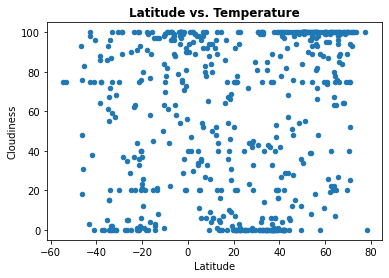

In [68]:
weather_data_df.plot.scatter (x='Latitude', y='Cloudiness')

plt.title('Latitude vs. Cloudiness',
         fontweight = 'bold')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Windspeed')

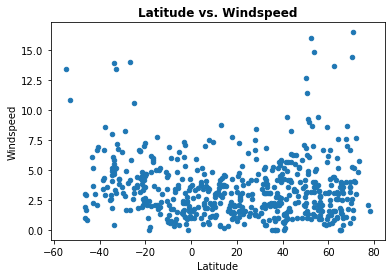

In [69]:
weather_data_df.plot.scatter (x='Latitude', y='Windspeed')

plt.title('Latitude vs. Windspeed',
         fontweight = 'bold')

## Linear Regression

In [83]:
#northern hemisphere is where latitude >= 0

northern_df = weather_data_df.loc[weather_data_df['Latitude'] >= 0]
southern_df = weather_data_df.loc[weather_data_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared value is 0.72


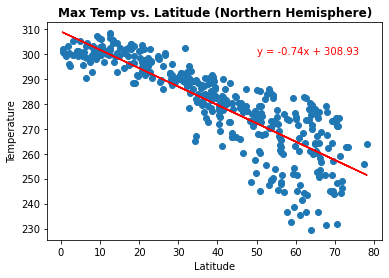

In [88]:
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,300), color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Max Temp vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared value is 0.37


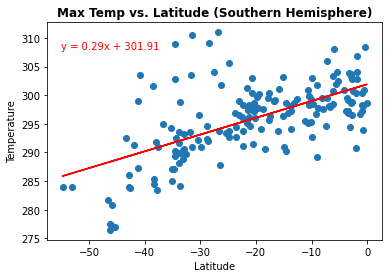

In [89]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,308), color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Max Temp vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared value is 0.21


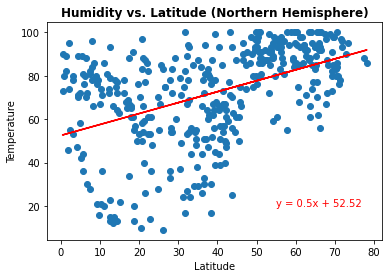

In [97]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,20), color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Humidity vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared value is 0.02


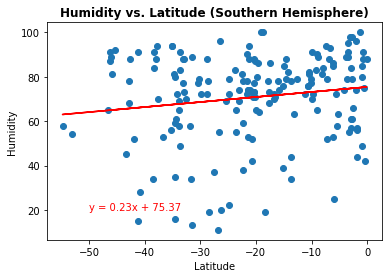

In [100]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20), color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared value is 0.1


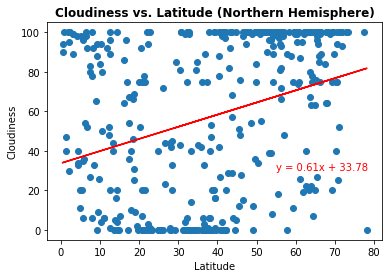

In [103]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,30), color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared value is 0.06


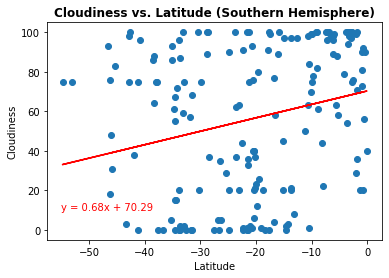

In [106]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10), color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared value is 0.02


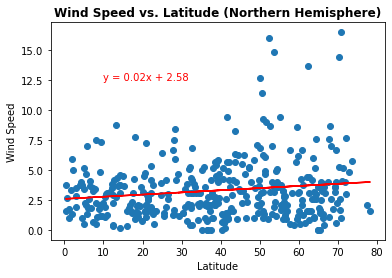

In [109]:
x_values = northern_df['Latitude']
y_values = northern_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12.5), color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared value is 0.12


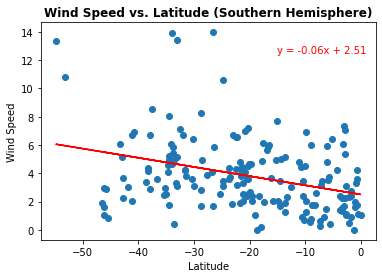

In [113]:
x_values = southern_df['Latitude']
y_values = southern_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,12.5), color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()